In [15]:

import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)


In [16]:
data

array([[ 3459],
       [ 3458],
       [ 4002],
       [ 4564],
       [ 4221],
       [ 4529],
       [ 4466],
       [ 4137],
       [ 4126],
       [ 4259],
       [ 4240],
       [ 4936],
       [ 3031],
       [ 3261],
       [ 4160],
       [ 4377],
       [ 4307],
       [ 4696],
       [ 4458],
       [ 4457],
       [ 4364],
       [ 4236],
       [ 4500],
       [ 4974],
       [ 3075],
       [ 3377],
       [ 4443],
       [ 4261],
       [ 4460],
       [ 4985],
       [ 4324],
       [ 4719],
       [ 4374],
       [ 4248],
       [ 4784],
       [ 4971],
       [ 3370],
       [ 3484],
       [ 4269],
       [ 3994],
       [ 4715],
       [ 4974],
       [ 4223],
       [ 5000],
       [ 4235],
       [ 4554],
       [ 4851],
       [ 4826],
       [ 3699],
       [ 3983],
       [ 4262],
       [ 4619],
       [ 5219],
       [ 4836],
       [ 4941],
       [ 5062],
       [ 4365],
       [ 5012],
       [ 4850],
       [ 5097],
       [ 3758],
       [ 3825],
       [

In [17]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [18]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1,
                    validation_data=(X_test, y_test))


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0985 - val_loss: 0.0494
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 0.0220
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - val_loss: 0.0161
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0145
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 0.0093
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0070
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0064
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0122
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - val_loss: 0.0050
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0092
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - val_loss: 0.0141
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_l

In [22]:
y_pred = model.predict(X_test, verbose=0).reshape(-1)
y_true = y_test.reshape(-1)

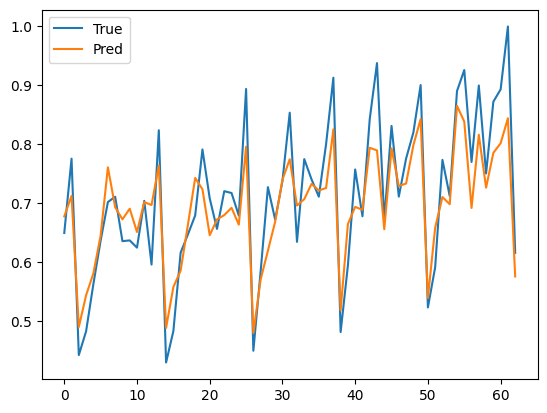

In [25]:

# 5. 예측
plt.plot(y_true, label='True')
plt.plot(y_pred, label='Pred')
plt.legend(); plt.show()

In [26]:
mse = np.mean((y_true - y_pred) ** 2)
ss_res = np.sum((y_true - y_pred) ** 2)
ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")

MSE : 0.0036
R²  : 0.7941
